In [1]:
import os
import sys
import yaml
from glob import glob
from copy import deepcopy
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from corner import corner

from mejiro.analysis import lensing
from mejiro.utils import util

# read configuration file
with open('hwo.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '05')

# pickles = sorted(glob(os.path.join(data_dir, 'sca*', 'Exposure_*.pkl')))
pickles = sorted(glob(os.path.join(data_dir, 'Exposure_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 1000 pickle(s) in /data/bwedig/mejiro/hwo/05


In [7]:
exposures = [util.unpickle(f) for f in pickles]

In [5]:
name_snr_pairs = util.unpickle(os.path.join(config['data_dir'], config['pipeline_label'], 'snr', 'name_snr_pairs.pkl'))

In [6]:
print(name_snr_pairs)

[('hwo_00000131', 318.2776647741046), ('hwo_00000050', 307.6636952184539), ('hwo_00000076', 294.8541653034648), ('hwo_00000056', 235.3410818136969), ('hwo_00000231', 491.4909796918411), ('hwo_00000300', 199.17749053978687), ('hwo_00000210', 340.5360137576545), ('hwo_00000242', 301.63016943373145), ('hwo_00000291', 204.08717995475322), ('hwo_00000029', 306.87603123050263), ('hwo_00000260', 194.39686171597035), ('hwo_00000099', 230.11005694660227), ('hwo_00000140', 452.88638235618663), ('hwo_00001313', 374.68493531840227), ('hwo_00000027', 231.63527010267657), ('hwo_00000145', 208.4010434364646), ('hwo_00000236', 425.08122992069565), ('hwo_00000198', 300.9716497867428), ('hwo_00001332', 372.96298338716434), ('hwo_00000257', 213.9376559634), ('hwo_00000233', 198.32967347611174), ('hwo_00000209', 509.9336869504695), ('hwo_00001427', 226.12199328183559), ('hwo_00000019', 208.7891451679867), ('hwo_00001360', 256.3945031653255), ('hwo_00001439', 412.0621828095003), ('hwo_00000031', 192.748189

In [8]:
# Create a mapping from name to SNR for fast lookup
snr_dict = dict(name_snr_pairs)

# Sort exposures by SNR, matching on exposure.synthetic_image.strong_lens.name
sorted_exposures = sorted(
    exposures,
    key=lambda exp: snr_dict.get(exp.synthetic_image.strong_lens.name, -np.inf),
    reverse=True
)

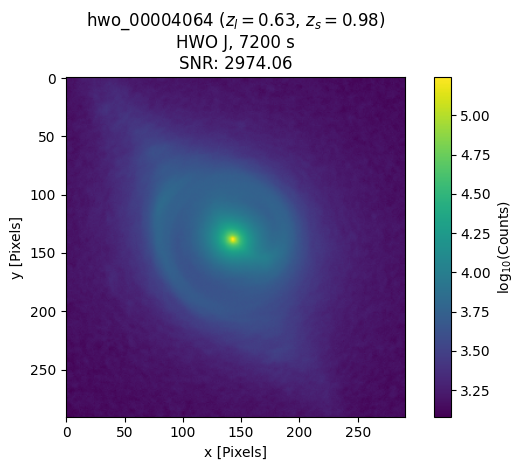

In [13]:
highest = sorted_exposures[0]
highest.plot(show_snr=True)

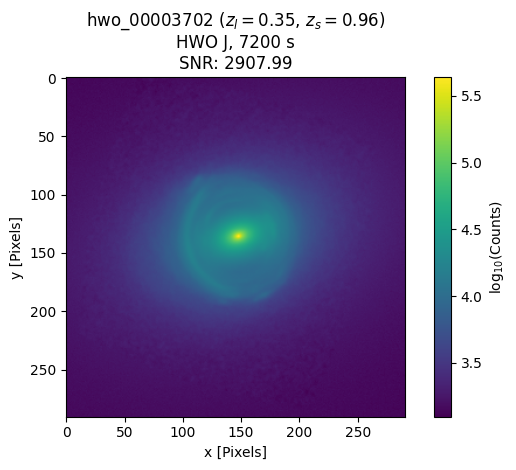

In [14]:
next = sorted_exposures[1]
next.plot(show_snr=True)